1. Создайте и заполните таблицу запросами, создайте техническое поле `ID` c параметрами `INTEGER PRIMARY KEY AUTOINCREMENT`.

In [1]:
import sqlite3 
import os

In [2]:
DATABASE_NAME = r'works.sqlite'

In [3]:
if os.path.isfile(DATABASE_NAME):
    os.remove(DATABASE_NAME)
con = sqlite3.connect(DATABASE_NAME)

In [4]:
query = r"""CREATE TABLE IF NOT EXISTS works (ID INTEGER PRIMARY KEY AUTOINCREMENT, 
salary INTEGER, educationType TEXT, jobTitle TEXT, qualification TEXT, gender TEXT, dateModify DATE, skills TEXT,
otherInfo TEXT);"""

In [5]:
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS works")
cur.execute(query)

In [6]:
cur.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'gender', 'TEXT', 0, None, 0),
 (6, 'dateModify', 'DATE', 0, None, 0),
 (7, 'skills', 'TEXT', 0, None, 0),
 (8, 'otherInfo', 'TEXT', 0, None, 0)]

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("works.csv")
df.to_sql('works', con, if_exists="append", index=False)

In [9]:
cur.execute("SELECT * FROM works LIMIT 5").fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  'Мужской',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None),
 (2,
  85000,
  'Высшее',
  'менеджер проектов',
  None,
  'Мужской',
  '2021-04-01',
  None,
  None),
 (3,
  15000,
  'Среднее профессиональное',
  '....',
  None,
  'Женский',
  '2021-06-01',
  None,
  None),
 (4, 30000, None, None, None, 'Женский', '2021-04-03', None, None),
 (5, 45000, None, None, None, 'Мужской', '2021-06-28', None, None)]

2. Добавьте индекс на поле `salary`. Изменится ли после этого размер файла? На сколько?

In [10]:
import os.path
sixe_before_index = os.path.getsize(DATABASE_NAME)
print(f"Размер до создания индекса: {sixe_before_index} байт(а).")

Размер до создания индекса: 6500352 байт(а).


In [11]:
cur.execute("CREATE INDEX salary_index on works (salary)")

In [12]:
size_after_index = os.path.getsize(DATABASE_NAME)
print(f"Размер после создания индекса: {size_after_index} байт(а).")
print(f"Разница: {size_after_index - sixe_before_index} байт(а).")

Размер после создания индекса: 6844416 байт(а).
Разница: 344064 байт(а).


3. Выведите количество записей.

In [13]:
row_count = cur.execute("SELECT COUNT(*) FROM works").fetchone()
print(row_count[0])

32683


4. Выведите количество мужчин и женщин.

In [14]:
genders = ("Мужской", "Женский")

for gender in genders:
    count = cur.execute(f"SELECT COUNT(*) FROM works WHERE {gender=}").fetchone()
    print(f"Количество людей с гендором '{gender}': {count[0]}")

Количество людей с гендором 'Мужской': 13386
Количество людей с гендором 'Женский': 17910


5. У скольки записей заполены skills?

In [15]:
skills_count = cur.execute("SELECT COUNT(*) FROM works WHERE skills IS NOT NULL").fetchone()
print(f"Количество заполненных скилов: {skills_count[0]}.")

Количество заполненных скилов: 8972.


6. Получить заполненные скиллы.

In [16]:
skills = cur.execute("SELECT skills FROM works WHERE skills IS NOT NULL").fetchall()
skills = [skls[0] for skls in skills]
print(*skills[:5], sep="\n\n")

<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>

Ответственная,пунктуальная,дисциплинированная я,стрессоустойчивая,легкообучаема ,технически оснащена

<p>Коммуникабельность&nbsp;</p>

<p>Ответственность в работе</p>

<p>Усидчивость, умение удерживать в памяти нужную информацию,скрупулезность, пунктуальность, умение планировать и организовать рабочий процесс,дальновидность, умение собирать и анализировать данные, аккуратность, нацеленность на результат.</p>


7. Вывести зарплату только у тех, у кого в скилах есть Python.

In [17]:
query = "SELECT salary FROM works WHERE lower(skills) LIKE '%python%' OR lower(skills) LIKE '%питон%'"
python_salaries = cur.execute(query).fetchall()
python_salaries = [slr[0] for slr in python_salaries]
print(*python_salaries[:5], sep="\n\n")

35000

20000

35000

15000

25000


8. Построить перцентили и разброс по з/п у мужчин и женщин.

In [18]:
import numpy as np

q = [i/10 for i in range(1, 11)]
for gender in genders:
    query = f"SELECT salary FROM works WHERE {gender=}"
    salaries = [slr[0] for slr in cur.execute(query).fetchall()]
    res = np.quantile(np.array(salaries), q)
    print(f"{gender=}")
    print(*[f"{i} -> {j}" for i, j in zip(q, res)], sep="\n")

gender='Мужской'
0.1 -> 15000.0
0.2 -> 20000.0
0.3 -> 25000.0
0.4 -> 30000.0
0.5 -> 30000.0
0.6 -> 35000.0
0.7 -> 40000.0
0.8 -> 50000.0
0.9 -> 60000.0
1.0 -> 1000000.0
gender='Женский'
0.1 -> 15000.0
0.2 -> 18000.0
0.3 -> 20000.0
0.4 -> 22000.0
0.5 -> 25000.0
0.6 -> 30000.0
0.7 -> 30000.0
0.8 -> 35000.0
0.9 -> 47000.0
1.0 -> 900000.0


9. Построить графики распределения по з/п мужчин и женщин (а также в зависимости от высшего образования).

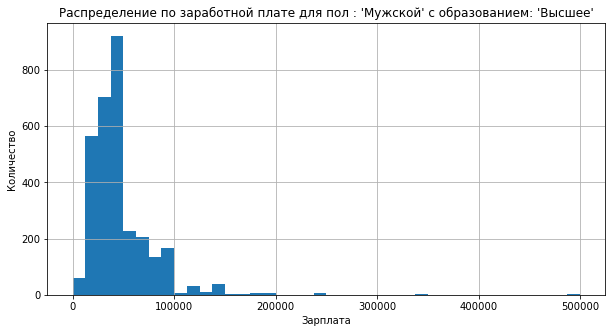

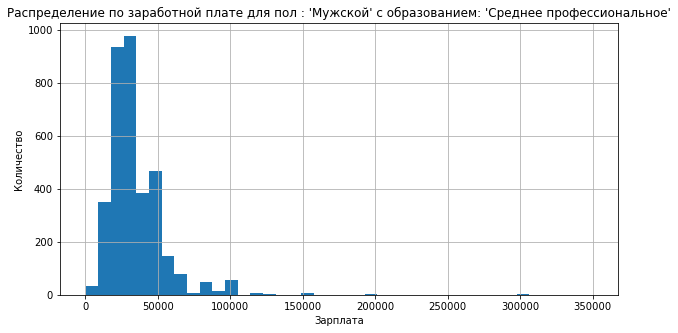

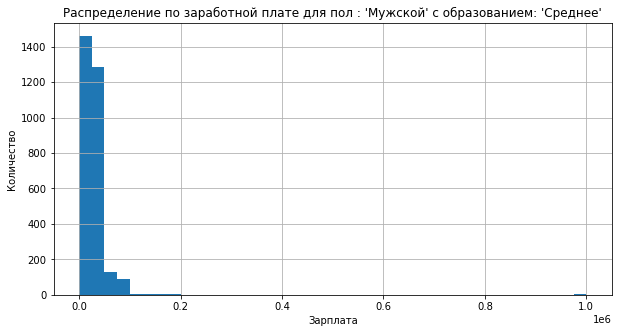

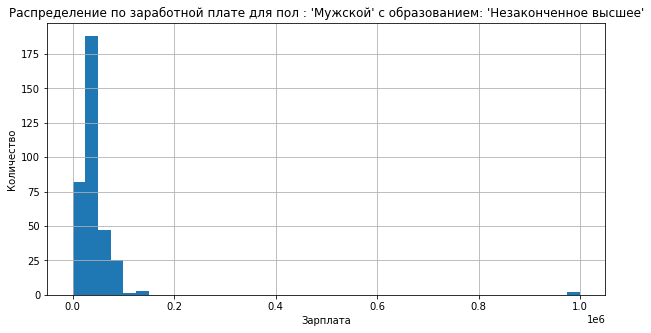

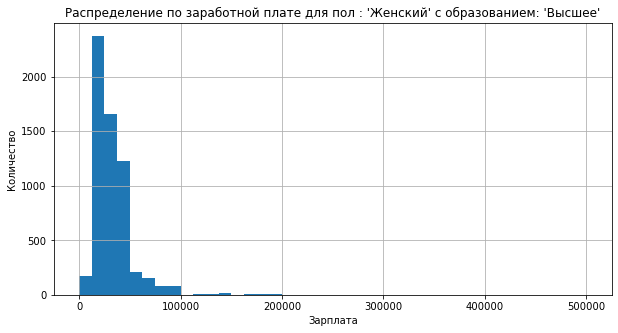

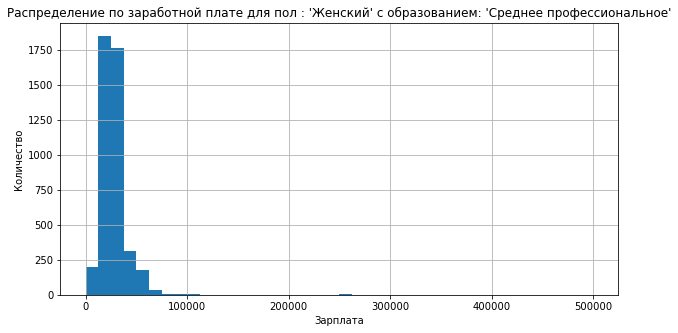

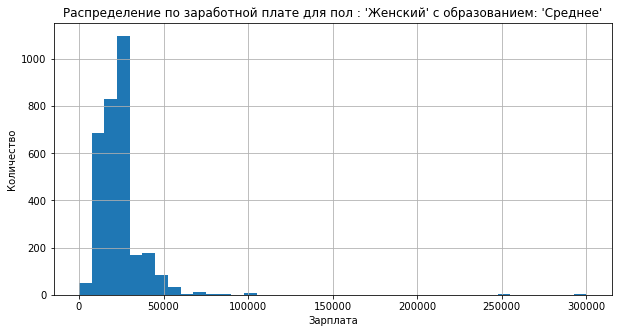

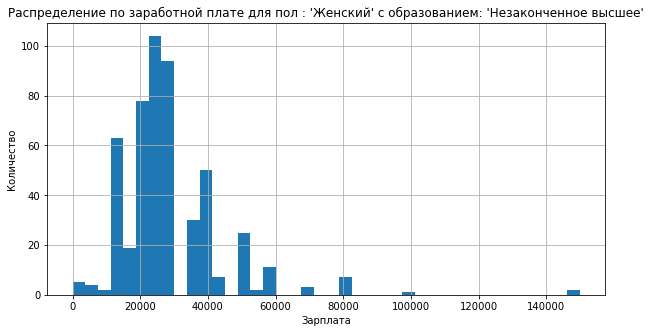

In [19]:
import matplotlib.pyplot as plt

educations = cur.execute("SELECT DISTINCT educationType FROM works WHERE educationType IS NOT NULL").fetchall()
educations = [ed[0] for ed in educations]

for gender in genders:
    for educationType in educations:
        plt.figure(figsize=(10, 5))  
        plt.grid()
        plt.title(f"Распределение по заработной плате для пол : '{gender}' с образованием: '{educationType}'") 
        plt.xlabel("Зарплата") 
        plt.ylabel("Количество") 
        query = f'SELECT salary FROM works WHERE {gender=} and {educationType=}'
        salaries = [i[0] for i in cur.execute(query).fetchall()]
        plt.hist(salaries, bins=40)
        



ДЗ

Выделим отдельные сущности:

Создайте отдельную таблицу с гендером, заполните ее значениями, сделайте на нее внешний ключ из таблицы works.

Отдельная таблица для образования.

In [20]:
cur.execute("DROP TABLE IF EXISTS genders")
cur.execute("CREATE TABLE IF NOT EXISTS genders (ID INTEGER PRIMARY KEY AUTOINCREMENT, gender TEXT)")
cur.executemany("INSERT INTO genders(gender) VALUES (?);", [(g, ) for g in genders])
cur.execute("DROP TABLE IF EXISTS educations")
cur.execute("CREATE TABLE IF NOT EXISTS educations (ID INTEGER PRIMARY KEY AUTOINCREMENT, education TEXT)")
cur.executemany("INSERT INTO educations(education) VALUES (?);", [(e, ) for e in educations])
con.commit()

In [21]:
table_data = cur.execute("SELECT * FROM works").fetchall()
cur.execute("DROP TABLE IF EXISTS works") 

genders_converter = {j:i + 1 for i, j in enumerate(genders)}
educations_converter = {j: i + 1  for i, j in enumerate(educations)}

query = r"""CREATE TABLE IF NOT EXISTS works (ID INTEGER PRIMARY KEY AUTOINCREMENT, 
salary INTEGER, educationType INTEGER, jobTitle TEXT, qualification TEXT , gender INTEGER, dateModify DATE, skills TEXT,
otherInfo TEXT, FOREIGN KEY (educationType) REFERENCES educations (ID), FOREIGN KEY (gender) REFERENCES genders (ID));"""
cur.execute(query)

data_with_refs = []
for row in table_data:
    edu = educations_converter.get(row[2])
    gender = genders_converter.get(row[5])
    data_with_refs.append((*row[:2], edu, *row[3:5], gender, *row[6:]))
    
cur.executemany("INSERT INTO works VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?)", data_with_refs)
con.commit()

Скилы и otherInfo. Очистите эти поля от HTML.

In [22]:
import re

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
data_to_clear = cur.execute("SELECT ID, skills, otherInfo from works").fetchall()

In [23]:
cleared_data = []
for i, skill, other_info in data_to_clear:
    if skill is not None:
        skill = re.sub(CLEANR, '', skill)
    if other_info is not None:
        other_info = re.sub(CLEANR, '', other_info)
    cleared_data.append((skill, other_info, i))

In [24]:
cur.executemany("UPDATE works SET skills = ?, otherInfo = ? WHERE ID = ?", cleared_data)
con.commit()